In [11]:
import numpy as np
import pandas as pd

def compute_covariance_matrix(X):
    """
    Compute the covariance matrix of the input matrix X.
    
    Parameters:
    - X: Input matrix (features in columns, samples in rows)
    
    Returns:
    - Covariance matrix of X
    """
    mean_vector = np.mean(X, axis=0)
    centered_data = X - mean_vector
    covariance_matrix = np.cov(centered_data, rowvar=False)
    
    return covariance_matrix

def compute_eigenvalues_and_vectors(cov_matrix):
    """
    Compute the eigenvalues and eigenvectors of the input covariance matrix.
    
    Parameters:
    - cov_matrix: Covariance matrix
    
    Returns:
    - Eigenvalues and eigenvectors
    """
    eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
    # Sorting eigenvalues and corresponding eigenvectors in descending order
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:, sorted_indices]
    
    return eigenvalues, eigenvectors

def apply_pca(X, num_components):
    """
    Apply PCA to reduce the dimensionality of the input matrix X to the specified number of components.
    
    Parameters:
    - X: Input matrix (features in columns, samples in rows)
    - num_components: Number of principal components to retain
    
    Returns:
    - Reduced data matrix
    """
    cov_matrix = compute_covariance_matrix(X)
    eigenvalues, eigenvectors = compute_eigenvalues_and_vectors(cov_matrix)
    
    # Retain the top 'num_components' eigenvectors
    top_eigenvectors = eigenvectors[:, :num_components]
    
    # Project the data onto the selected eigenvectors
    reduced_data = np.dot(X, top_eigenvectors)
    
    return reduced_data

# Load the dataset
dataset = pd.read_csv('telescope_data.csv')

# Extract features and labels
X = dataset.iloc[:, :-1].values

# Choose the number of principal components to retain (e.g., 95% variance)
total_variance = np.sum(np.var(X, axis=0))
explained_variance_ratio = np.cumsum(np.var(X, axis=0)) / total_variance
num_components = np.argmax(explained_variance_ratio >= 0.95) + 1

# Apply PCA
reduced_data = apply_pca(X, num_components)

# Display the results
print(f"Original number of features: {X.shape[1]}")
print(f"Number of retained principal components: {num_components}")
print(f"Reduced data shape: {reduced_data.shape}")


Original number of features: 10
Number of retained principal components: 10
Reduced data shape: (201, 10)


In [12]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the dataset
dataset = pd.read_csv('telescope_data.csv')

# Extract features and labels
X = dataset.iloc[:, :-1].values

# Standardize the features (important for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create a PCA instance
pca = PCA()

# Fit the PCA model to the standardized data
pca.fit(X_scaled)

# Determine the number of principal components to retain (e.g., 95% variance)
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
num_components = np.argmax(cumulative_variance_ratio >= 0.95) + 1

# Apply PCA with the selected number of components
pca = PCA(n_components=num_components)
reduced_data = pca.fit_transform(X_scaled)

# Display the results
print(f"Original number of features: {X.shape[1]}")
print(f"Number of retained principal components: {num_components}")
print(f"Reduced data shape: {reduced_data.shape}")


Original number of features: 10
Number of retained principal components: 7
Reduced data shape: (201, 7)


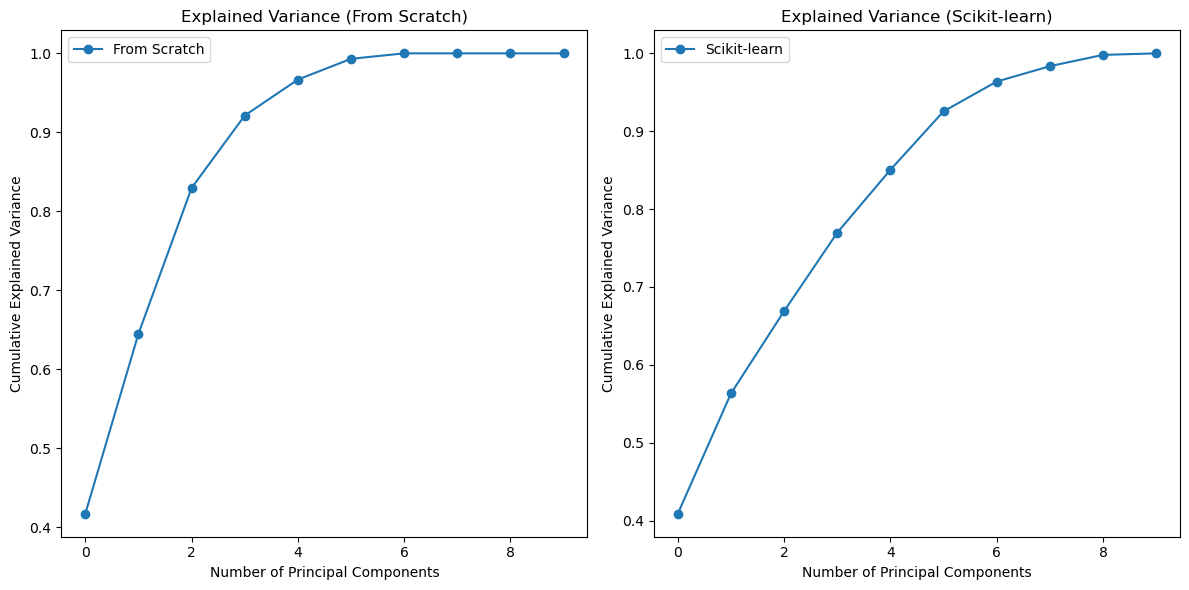

Number of retained principal components (From Scratch): 5
Reduced data shape (From Scratch): (201, 5)
Number of retained principal components (Scikit-learn): 7
Reduced data shape (Scikit-learn): (201, 7)


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the dataset
dataset = pd.read_csv('telescope_data.csv')

# Extract features and labels
X = dataset.iloc[:, :-1].values

# Standardize the features (important for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define the PCA function from scratch
def apply_pca_from_scratch(X, num_components):
    cov_matrix = np.cov(X, rowvar=False)
    eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:, sorted_indices]
    top_eigenvectors = eigenvectors[:, :num_components]
    reduced_data = np.dot(X, top_eigenvectors)
    return reduced_data

# Choose the number of principal components to retain (e.g., 95% variance)
total_variance = np.sum(np.var(X, axis=0))
explained_variance_ratio_scratch = np.cumsum(np.var(apply_pca_from_scratch(X, X.shape[1]), axis=0)) / total_variance

# Apply PCA from scratch
num_components_scratch = np.argmax(explained_variance_ratio_scratch >= 0.95) + 1
reduced_data_scratch = apply_pca_from_scratch(X, num_components_scratch)

# Create a PCA instance for scikit-learn implementation
pca = PCA()

# Fit the PCA model to the standardized data
pca.fit(X_scaled)

# Determine the number of principal components to retain (e.g., 95% variance)
explained_variance_ratio_sklearn = pca.explained_variance_ratio_
cumulative_variance_ratio_sklearn = np.cumsum(explained_variance_ratio_sklearn)
num_components_sklearn = np.argmax(cumulative_variance_ratio_sklearn >= 0.95) + 1

# Apply PCA with the selected number of components
pca = PCA(n_components=num_components_sklearn)
reduced_data_sklearn = pca.fit_transform(X_scaled)

# Plot explained variance
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(explained_variance_ratio_scratch, marker='o', label='From Scratch')
plt.title('Explained Variance (From Scratch)')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(cumulative_variance_ratio_sklearn, marker='o', label='Scikit-learn')
plt.title('Explained Variance (Scikit-learn)')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.legend()

plt.tight_layout()
plt.show()

# Compare the reduced feature sets
print(f"Number of retained principal components (From Scratch): {num_components_scratch}")
print(f"Reduced data shape (From Scratch): {reduced_data_scratch.shape}")

print(f"Number of retained principal components (Scikit-learn): {num_components_sklearn}")
print(f"Reduced data shape (Scikit-learn): {reduced_data_sklearn.shape}")


In [20]:
import numpy as np
import pandas as pd

def rbf_kernel(x1, x2, gamma=1.0):
    """
    Radial Basis Function (RBF) kernel.
    
    Parameters:
    - x1: First data point
    - x2: Second data point
    - gamma: Kernel parameter
    
    Returns:
    - RBF kernel value
    """
    diff = x1 - x2
    return np.exp(-gamma * np.dot(diff, diff))

def center_kernel_matrix(K):
    """
    Center the kernel matrix.
    
    Parameters:
    - K: Kernel matrix
    
    Returns:
    - Centered kernel matrix
    """
    n = K.shape[0]
    one_n = np.ones((n, n)) / n
    centered_K = K - np.dot(one_n, K) - np.dot(K, one_n) + np.dot(np.dot(one_n, K), one_n)
    return centered_K

def kernel_pca(X, num_components, gamma=1.0):
    """
    Kernel PCA with RBF kernel.
    
    Parameters:
    - X: Input data matrix
    - num_components: Number of principal components
    - gamma: Kernel parameter
    
    Returns:
    - Reduced data matrix
    """
    n = X.shape[0]
    
    # Compute the kernel matrix
    K = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            K[i, j] = rbf_kernel(X[i], X[j], gamma)
    
    # Center the kernel matrix
    centered_K = center_kernel_matrix(K)
    
    # Eigenvalue decomposition
    eigenvalues, eigenvectors = np.linalg.eigh(centered_K)
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:, sorted_indices]
    
    # Retain the top 'num_components' eigenvectors
    top_eigenvectors = eigenvectors[:, :num_components]
    
    # Project the data onto the selected eigenvectors
    reduced_data = np.dot(centered_K, top_eigenvectors)
    
    return reduced_data

# Load the dataset
dataset = pd.read_csv('telescope_data.csv')

# Extract features and labels
X = dataset.iloc[:, :-1].values

# Apply Kernel PCA
reduced_data_kpca = kernel_pca(X, num_components=2, gamma=0.1)

# Display the results
print(f"Original data shape: {X.shape}")
print(f"Reduced data shape (Kernel PCA): {reduced_data_kpca.shape}")


Original data shape: (201, 10)
Reduced data shape (Kernel PCA): (201, 2)


In [21]:
import numpy as np
import pandas as pd

def polynomial_kernel(x1, x2, degree=2, coef0=1.0):
    """
    Polynomial kernel.
    
    Parameters:
    - x1: First data point
    - x2: Second data point
    - degree: Polynomial degree
    - coef0: Polynomial coefficient
    
    Returns:
    - Polynomial kernel value
    """
    return (np.dot(x1, x2) + coef0)**degree

def center_kernel_matrix(K):
    """
    Center the kernel matrix.
    
    Parameters:
    - K: Kernel matrix
    
    Returns:
    - Centered kernel matrix
    """
    n = K.shape[0]
    one_n = np.ones((n, n)) / n
    centered_K = K - np.dot(one_n, K) - np.dot(K, one_n) + np.dot(np.dot(one_n, K), one_n)
    return centered_K

def kernel_pca(X, num_components, degree=2, coef0=1.0):
    """
    Kernel PCA with polynomial kernel.
    
    Parameters:
    - X: Input data matrix
    - num_components: Number of principal components
    - degree: Polynomial degree
    - coef0: Polynomial coefficient
    
    Returns:
    - Reduced data matrix
    """
    n = X.shape[0]
    
    # Compute the kernel matrix
    K = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            K[i, j] = polynomial_kernel(X[i], X[j], degree=degree, coef0=coef0)
    
    # Center the kernel matrix
    centered_K = center_kernel_matrix(K)
    
    # Eigenvalue decomposition
    eigenvalues, eigenvectors = np.linalg.eigh(centered_K)
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:, sorted_indices]
    
    # Retain the top 'num_components' eigenvectors
    top_eigenvectors = eigenvectors[:, :num_components]
    
    # Project the data onto the selected eigenvectors
    reduced_data = np.dot(centered_K, top_eigenvectors)
    
    return reduced_data

# Load the dataset
dataset = pd.read_csv('telescope_data.csv')

# Extract features and labels
X = dataset.iloc[:, :-1].values

# Apply Kernel PCA with polynomial kernel
reduced_data_kpca_poly = kernel_pca(X, num_components=2, degree=3, coef0=1.0)

# Display the results
print(f"Original data shape: {X.shape}")
print(f"Reduced data shape (Kernel PCA with Polynomial Kernel): {reduced_data_kpca_poly.shape}")


Original data shape: (201, 10)
Reduced data shape (Kernel PCA with Polynomial Kernel): (201, 2)


In [22]:
import numpy as np
import pandas as pd

def linear_kernel(x1, x2):
    """
    Linear kernel.
    
    Parameters:
    - x1: First data point
    - x2: Second data point
    
    Returns:
    - Linear kernel value
    """
    return np.dot(x1, x2)

def center_kernel_matrix(K):
    """
    Center the kernel matrix.
    
    Parameters:
    - K: Kernel matrix
    
    Returns:
    - Centered kernel matrix
    """
    n = K.shape[0]
    one_n = np.ones((n, n)) / n
    centered_K = K - np.dot(one_n, K) - np.dot(K, one_n) + np.dot(np.dot(one_n, K), one_n)
    return centered_K

def kernel_pca_linear(X, num_components):
    """
    Kernel PCA with linear kernel.
    
    Parameters:
    - X: Input data matrix
    - num_components: Number of principal components
    
    Returns:
    - Reduced data matrix
    """
    n = X.shape[0]
    
    # Compute the linear kernel matrix
    K = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            K[i, j] = linear_kernel(X[i], X[j])
    
    # Center the kernel matrix
    centered_K = center_kernel_matrix(K)
    
    # Eigenvalue decomposition
    eigenvalues, eigenvectors = np.linalg.eigh(centered_K)
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:, sorted_indices]
    
    # Retain the top 'num_components' eigenvectors
    top_eigenvectors = eigenvectors[:, :num_components]
    
    # Project the data onto the selected eigenvectors
    reduced_data = np.dot(centered_K, top_eigenvectors)
    
    return reduced_data

# Load the dataset
dataset = pd.read_csv('telescope_data.csv')

# Extract features and labels
X = dataset.iloc[:, :-1].values

# Apply Kernel PCA with linear kernel
reduced_data_kpca_linear = kernel_pca_linear(X, num_components=2)

# Display the results
print(f"Original data shape: {X.shape}")
print(f"Reduced data shape (Kernel PCA - Linear): {reduced_data_kpca_linear.shape}")


Original data shape: (201, 10)
Reduced data shape (Kernel PCA - Linear): (201, 2)


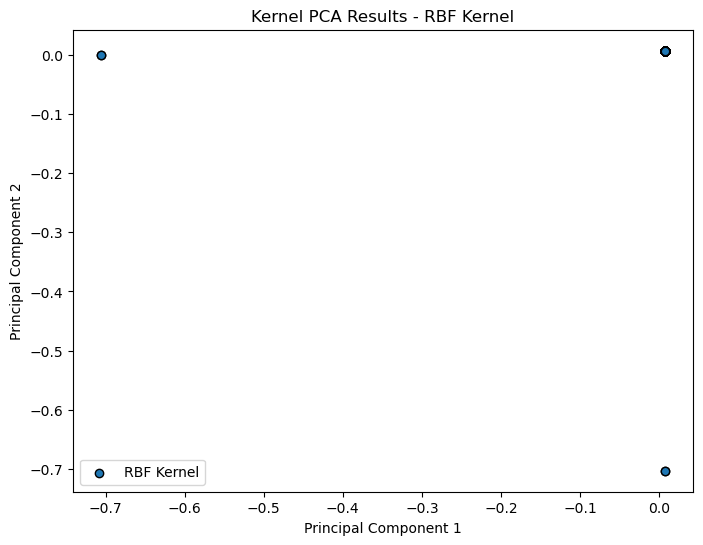

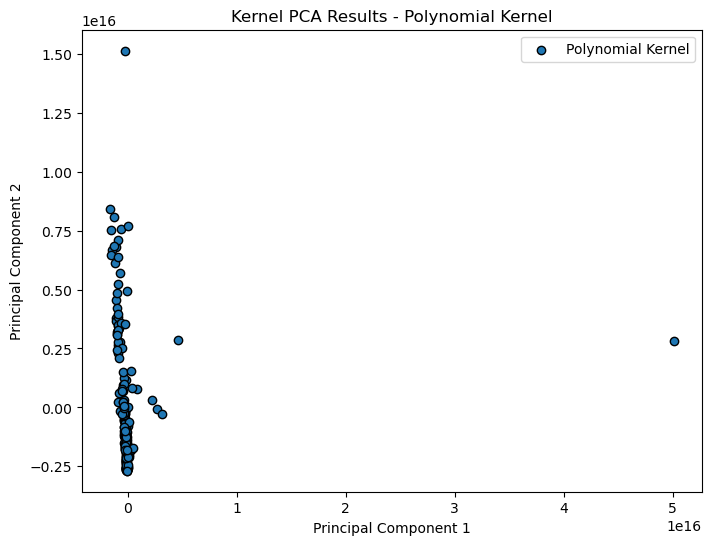

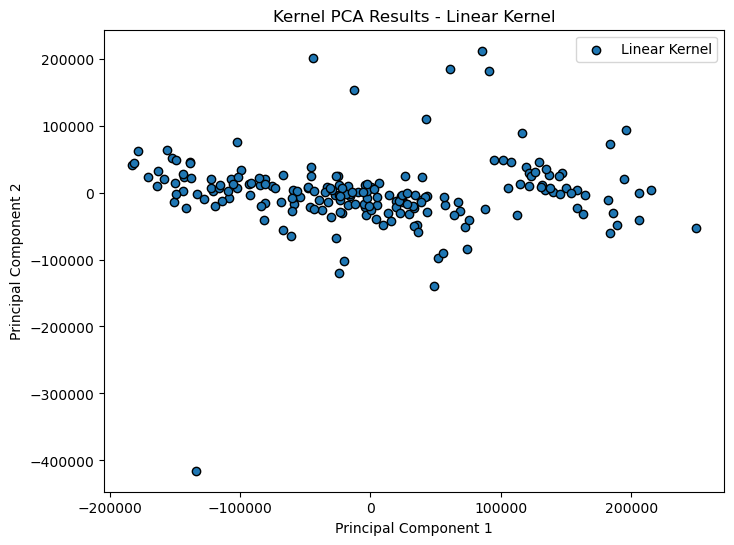

In [25]:
import matplotlib.pyplot as plt

# Assuming you already have the reduced data from each kernel
# reduced_data_kpca_rbf, reduced_data_kpca_polynomial, reduced_data_kpca_linear

# Plot RBF Kernel PCA Results
plt.figure(figsize=(8, 6))
plt.scatter(reduced_data_kpca[:, 0], reduced_data_kpca[:, 1], label='RBF Kernel', edgecolor='k')
plt.title('Kernel PCA Results - RBF Kernel')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

# Plot Polynomial Kernel PCA Results
plt.figure(figsize=(8, 6))
plt.scatter(reduced_data_kpca_poly[:, 0], reduced_data_kpca_poly[:, 1], label='Polynomial Kernel', edgecolor='k')
plt.title('Kernel PCA Results - Polynomial Kernel')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

# Plot Linear Kernel PCA Results
plt.figure(figsize=(8, 6))
plt.scatter(reduced_data_kpca_linear[:, 0], reduced_data_kpca_linear[:, 1], label='Linear Kernel', edgecolor='k')
plt.title('Kernel PCA Results - Linear Kernel')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset
dataset = pd.read_csv('telescope_data.csv')

# Extract features and labels
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting sets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (160, 10)
X_test shape: (41, 10)
y_train shape: (160,)
y_test shape: (41,)


In [27]:
import pandas as pd
from sklearn.decomposition import PCA, KernelPCA
from sklearn.preprocessing import StandardScaler

# Load the dataset
dataset = pd.read_csv('telescope_data.csv')

# Extract features and labels
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (important for PCA)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# KPCA with RBF Kernel
kpca_rbf = KernelPCA(n_components=2, kernel='rbf', gamma=0.1)
X_train_kpca_rbf = kpca_rbf.fit_transform(X_train_scaled)
X_test_kpca_rbf = kpca_rbf.transform(X_test_scaled)

# KPCA with Polynomial Kernel
kpca_poly = KernelPCA(n_components=2, kernel='poly', degree=3)
X_train_kpca_poly = kpca_poly.fit_transform(X_train_scaled)
X_test_kpca_poly = kpca_poly.transform(X_test_scaled)

# KPCA with Linear Kernel
kpca_linear = KernelPCA(n_components=2, kernel='linear')
X_train_kpca_linear = kpca_linear.fit_transform(X_train_scaled)
X_test_kpca_linear = kpca_linear.transform(X_test_scaled)

# Display the shapes of the resulting sets
print(f"X_train_pca shape: {X_train_pca.shape}")
print(f"X_test_pca shape: {X_test_pca.shape}")

print(f"X_train_kpca_rbf shape: {X_train_kpca_rbf.shape}")
print(f"X_test_kpca_rbf shape: {X_test_kpca_rbf.shape}")

print(f"X_train_kpca_poly shape: {X_train_kpca_poly.shape}")
print(f"X_test_kpca_poly shape: {X_test_kpca_poly.shape}")

print(f"X_train_kpca_linear shape: {X_train_kpca_linear.shape}")
print(f"X_test_kpca_linear shape: {X_test_kpca_linear.shape}")


X_train_pca shape: (160, 2)
X_test_pca shape: (41, 2)
X_train_kpca_rbf shape: (160, 2)
X_test_kpca_rbf shape: (41, 2)
X_train_kpca_poly shape: (160, 2)
X_test_kpca_poly shape: (41, 2)
X_train_kpca_linear shape: (160, 2)
X_test_kpca_linear shape: (41, 2)


In [28]:
from sklearn.metrics import accuracy_score

def minimum_distance_classifier(X_train, y_train, X_test):
    """
    Minimum Distance Classifier using Euclidean distance.
    
    Parameters:
    - X_train: Training features
    - y_train: Training labels
    - X_test: Test features
    
    Returns:
    - Predicted labels for the test set
    """
    predicted_labels = []
    for test_point in X_test:
        # Calculate Euclidean distance to each training point
        distances = np.linalg.norm(X_train - test_point, axis=1)
        
        # Find the index of the minimum distance
        min_index = np.argmin(distances)
        
        # Assign the label of the nearest training point
        predicted_label = y_train[min_index]
        
        predicted_labels.append(predicted_label)
    
    return np.array(predicted_labels)

# Classify using Minimum Distance Classifier with PCA features
y_pred_pca = minimum_distance_classifier(X_train_pca, y_train, X_test_pca)

# Classify using Minimum Distance Classifier with KPCA features (RBF Kernel)
y_pred_kpca_rbf = minimum_distance_classifier(X_train_kpca_rbf, y_train, X_test_kpca_rbf)

# Classify using Minimum Distance Classifier with KPCA features (Polynomial Kernel)
y_pred_kpca_poly = minimum_distance_classifier(X_train_kpca_poly, y_train, X_test_kpca_poly)

# Classify using Minimum Distance Classifier with KPCA features (Linear Kernel)
y_pred_kpca_linear = minimum_distance_classifier(X_train_kpca_linear, y_train, X_test_kpca_linear)

# Evaluate classification performance using accuracy metrics
accuracy_pca = accuracy_score(y_test, y_pred_pca)
accuracy_kpca_rbf = accuracy_score(y_test, y_pred_kpca_rbf)
accuracy_kpca_poly = accuracy_score(y_test, y_pred_kpca_poly)
accuracy_kpca_linear = accuracy_score(y_test, y_pred_kpca_linear)

# Display the results
print(f"Accuracy with PCA: {accuracy_pca:.4f}")
print(f"Accuracy with KPCA (RBF Kernel): {accuracy_kpca_rbf:.4f}")
print(f"Accuracy with KPCA (Polynomial Kernel): {accuracy_kpca_poly:.4f}")
print(f"Accuracy with KPCA (Linear Kernel): {accuracy_kpca_linear:.4f}")


Accuracy with PCA: 0.7073
Accuracy with KPCA (RBF Kernel): 0.7073
Accuracy with KPCA (Polynomial Kernel): 0.6585
Accuracy with KPCA (Linear Kernel): 0.7073


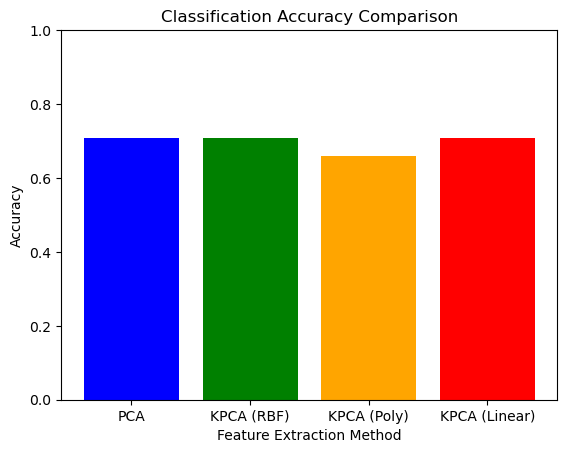

In [29]:
import matplotlib.pyplot as plt

# Accuracy values
accuracies = [accuracy_pca, accuracy_kpca_rbf, accuracy_kpca_poly, accuracy_kpca_linear]
methods = ['PCA', 'KPCA (RBF)', 'KPCA (Poly)', 'KPCA (Linear)']

# Plotting
plt.bar(methods, accuracies, color=['blue', 'green', 'orange', 'red'])
plt.ylim(0, 1.0)  # Set y-axis limit to 1 for better visualization
plt.title('Classification Accuracy Comparison')
plt.xlabel('Feature Extraction Method')
plt.ylabel('Accuracy')
plt.show()


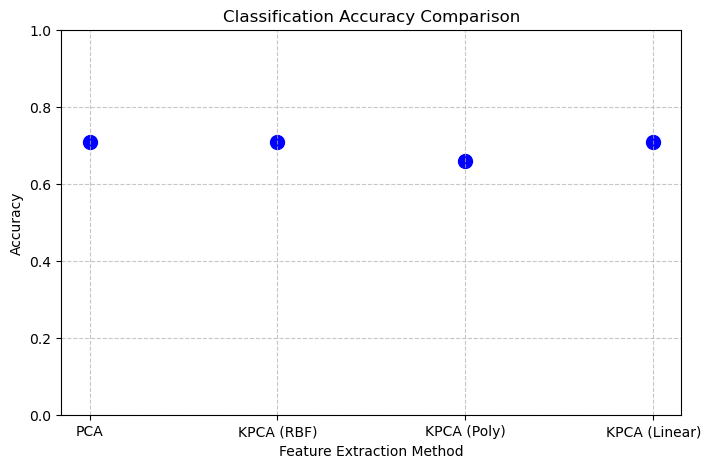

In [30]:
import matplotlib.pyplot as plt

# Accuracy values
accuracies = [accuracy_pca, accuracy_kpca_rbf, accuracy_kpca_poly, accuracy_kpca_linear]
methods = ['PCA', 'KPCA (RBF)', 'KPCA (Poly)', 'KPCA (Linear)']

# Plotting
plt.figure(figsize=(8, 5))
plt.scatter(methods, accuracies, color='blue', marker='o', s=100)
plt.ylim(0, 1.0)  # Set y-axis limit to 1 for better visualization
plt.title('Classification Accuracy Comparison')
plt.xlabel('Feature Extraction Method')
plt.ylabel('Accuracy')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


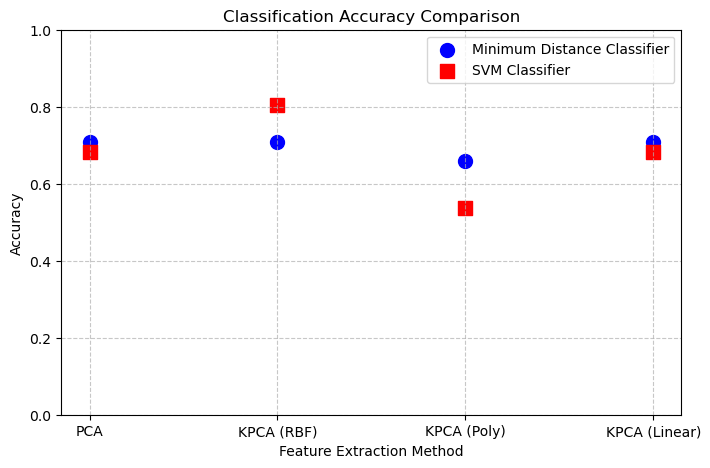

In [31]:
from sklearn.svm import SVC

# Train an SVM classifier with PCA features
svm_pca = SVC()
svm_pca.fit(X_train_pca, y_train)
y_pred_svm_pca = svm_pca.predict(X_test_pca)
accuracy_svm_pca = accuracy_score(y_test, y_pred_svm_pca)

# Train an SVM classifier with KPCA features (RBF Kernel)
svm_kpca_rbf = SVC()
svm_kpca_rbf.fit(X_train_kpca_rbf, y_train)
y_pred_svm_kpca_rbf = svm_kpca_rbf.predict(X_test_kpca_rbf)
accuracy_svm_kpca_rbf = accuracy_score(y_test, y_pred_svm_kpca_rbf)

# Train an SVM classifier with KPCA features (Polynomial Kernel)
svm_kpca_poly = SVC()
svm_kpca_poly.fit(X_train_kpca_poly, y_train)
y_pred_svm_kpca_poly = svm_kpca_poly.predict(X_test_kpca_poly)
accuracy_svm_kpca_poly = accuracy_score(y_test, y_pred_svm_kpca_poly)

# Train an SVM classifier with KPCA features (Linear Kernel)
svm_kpca_linear = SVC()
svm_kpca_linear.fit(X_train_kpca_linear, y_train)
y_pred_svm_kpca_linear = svm_kpca_linear.predict(X_test_kpca_linear)
accuracy_svm_kpca_linear = accuracy_score(y_test, y_pred_svm_kpca_linear)

# Plot the results using a scatter plot
accuracies_svm = [accuracy_svm_pca, accuracy_svm_kpca_rbf, accuracy_svm_kpca_poly, accuracy_svm_kpca_linear]

plt.figure(figsize=(8, 5))
plt.scatter(methods, accuracies, color='blue', label='Minimum Distance Classifier', marker='o', s=100)
plt.scatter(methods, accuracies_svm, color='red', label='SVM Classifier', marker='s', s=100)
plt.ylim(0, 1.0)  # Set y-axis limit to 1 for better visualization
plt.title('Classification Accuracy Comparison')
plt.xlabel('Feature Extraction Method')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


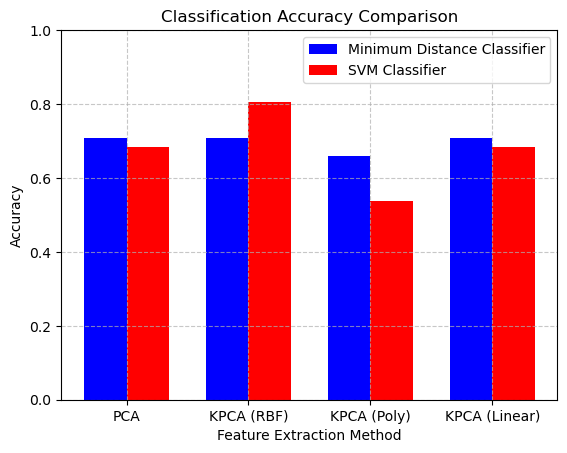

In [33]:
import matplotlib.pyplot as plt
import numpy as np

# Accuracy values for Minimum Distance Classifier
accuracies = [accuracy_pca, accuracy_kpca_rbf, accuracy_kpca_poly, accuracy_kpca_linear]

# Accuracy values for SVM Classifier
accuracies_svm = [accuracy_svm_pca, accuracy_svm_kpca_rbf, accuracy_svm_kpca_poly, accuracy_svm_kpca_linear]

# Plotting
bar_width = 0.35
index = np.arange(len(methods))

plt.bar(index, accuracies, width=bar_width, color='blue', label='Minimum Distance Classifier')
plt.bar(index + bar_width, accuracies_svm, width=bar_width, color='red', label='SVM Classifier')

plt.ylim(0, 1.0)  # Set y-axis limit to 1 for better visualization
plt.title('Classification Accuracy Comparison')
plt.xlabel('Feature Extraction Method')
plt.ylabel('Accuracy')
plt.xticks(index + bar_width / 2, methods)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()
